

**Description:** Weather prediction example with MLP ahead 24h

In [1]:
pip install Windrose

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from windrose import WindroseAxes


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, GaussianNoise, Input, BatchNormalization, ELU
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
#Import data
file = '/content/YHZ_hourly.csv'

df = pd.read_csv("/content/YHZ_hourly.csv")
df1 = pd.read_csv(file)
df99 = pd.read_csv("/content/weather_prediction_dataset.csv")

In [8]:
df99.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [9]:
a = df1.columns
a

Index(['x', 'y', 'STATION_NAME', 'CLIMATE_IDENTIFIER', 'ID', 'LOCAL_DATE',
       'PROVINCE_CODE', 'LOCAL_YEAR', 'LOCAL_MONTH', 'LOCAL_DAY', 'LOCAL_HOUR',
       'TEMP', 'TEMP_FLAG', 'DEW_POINT_TEMP', 'DEW_POINT_TEMP_FLAG', 'HUMIDEX',
       'HUMIDEX_FLAG', 'PRECIP_AMOUNT', 'PRECIP_AMOUNT_FLAG',
       'RELATIVE_HUMIDITY', 'RELATIVE_HUMIDITY_FLAG', 'STATION_PRESSURE',
       'STATION_PRESSURE_FLAG', 'VISIBILITY', 'VISIBILITY_FLAG', 'WINDCHILL',
       'WINDCHILL_FLAG', 'WIND_DIRECTION', 'WIND_DIRECTION_FLAG', 'WIND_SPEED',
       'WIND_SPEED_FLAG'],
      dtype='object')

In [10]:
# we create a datetime index
df1['date'] = pd.to_datetime(df1['LOCAL_DATE'])
df1 = df1.sort_values('date')
df1 = df1.reset_index(drop=True)

In [11]:
df2 = df1 [['date', 'TEMP']]
df2

,date,TEMP
0,1961-01-03 06:00:00,-5.6
1,1961-01-03 07:00:00,-6.1
2,1961-01-03 08:00:00,-6.1
3,1961-01-03 09:00:00,-6.1
4,1961-01-03 10:00:00,-6.1
...,...,...
71124,1986-02-09 10:00:00,-6.8
71125,1986-02-09 11:00:00,-5.6
71126,1986-02-09 12:00:00,-4.6
71127,1986-02-09 13:00:00,-3.5


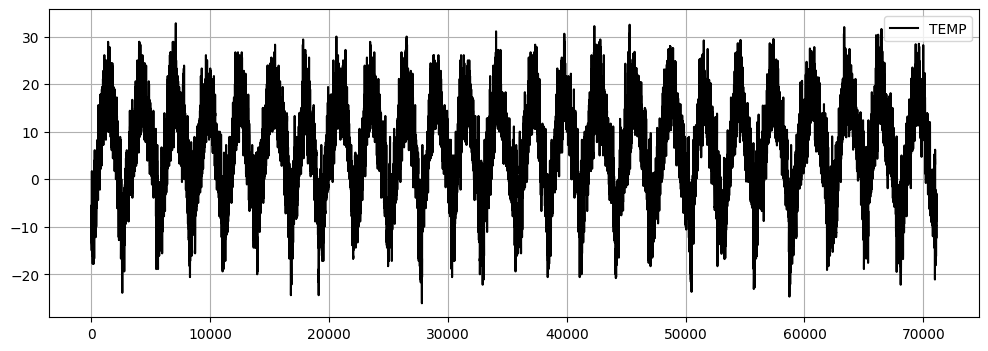

In [12]:
#Temperature plot
df2['TEMP'].plot(figsize=(12,4), color='black');
plt.legend()
plt.grid()
plt.show()

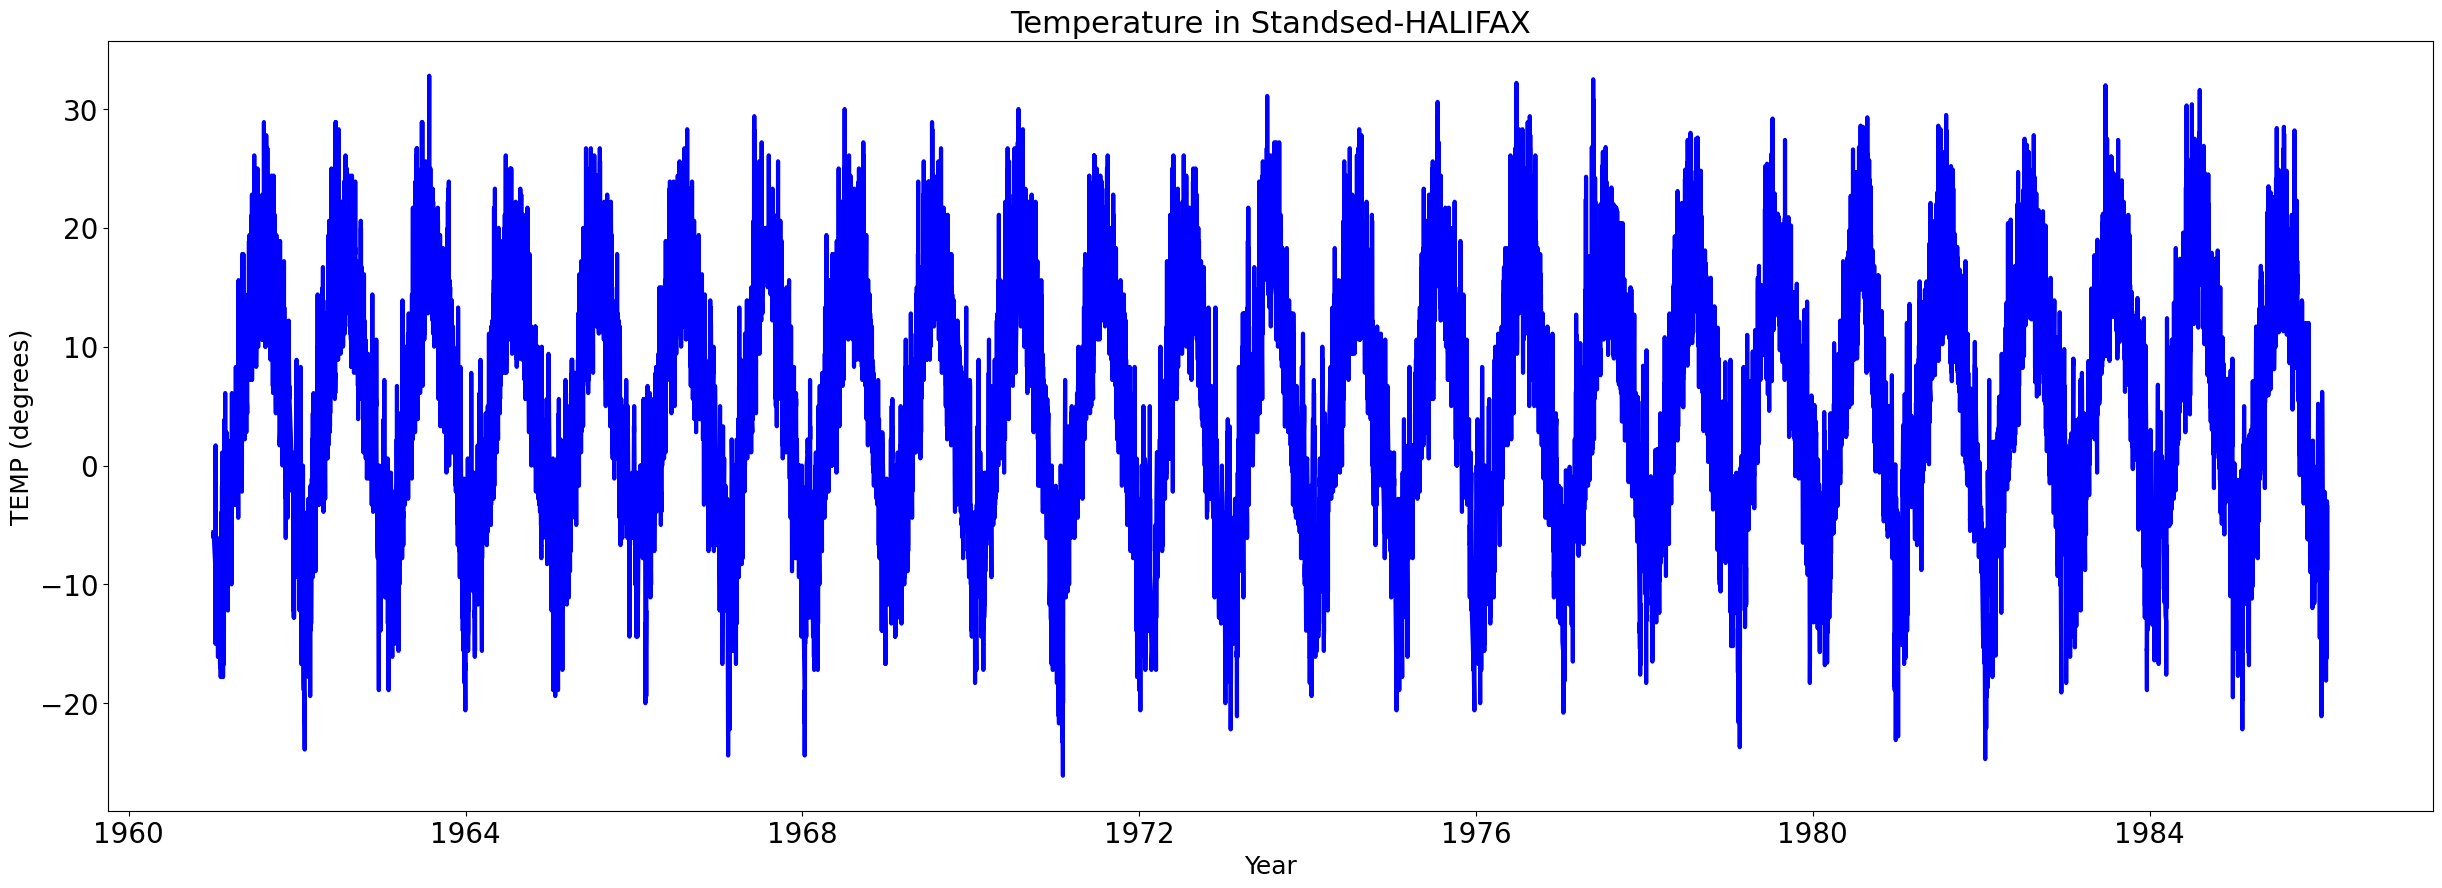

In [13]:
# DF2 has only TEMP
# More sophisticated plot
fig, ax = plt.subplots(figsize=(30,10))

ax.plot(df2['date'],df2['TEMP'],color='blue',linewidth=3.0)
#ax.scatter(df2['date'],df2['births'],color='red',s=100.)
plt.title("Temperature in Standsed-HALIFAX", size=22)
plt.ylabel("TEMP (degrees)", size=18)
plt.xlabel("Year", size=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig("Births per month Canada.jpg")
plt.show()


In [14]:
# Downsample series to average temp per day
df_day_grouped = df2.set_index('date').groupby(pd.Grouper(freq='d')).agg({'TEMP': ['mean', 'min', 'max']})
df_day_grouped = df_day_grouped.reset_index()
df_day_grouped.columns = df_day_grouped.columns.map(''.join)
df_day_grouped


,date,TEMPmean,TEMPmin,TEMPmax
0,1961-01-03,-5.933333,-6.1,-5.6
1,1961-01-04,NaN,NaN,NaN
2,1961-01-05,NaN,NaN,NaN
3,1961-01-06,NaN,NaN,NaN
4,1961-01-07,NaN,NaN,NaN
...,...,...,...,...
9164,1986-02-05,NaN,NaN,NaN
9165,1986-02-06,-7.833333,-11.4,-4.6
9166,1986-02-07,-11.575000,-16.2,-7.1
9167,1986-02-08,-7.966667,-12.4,-3.0


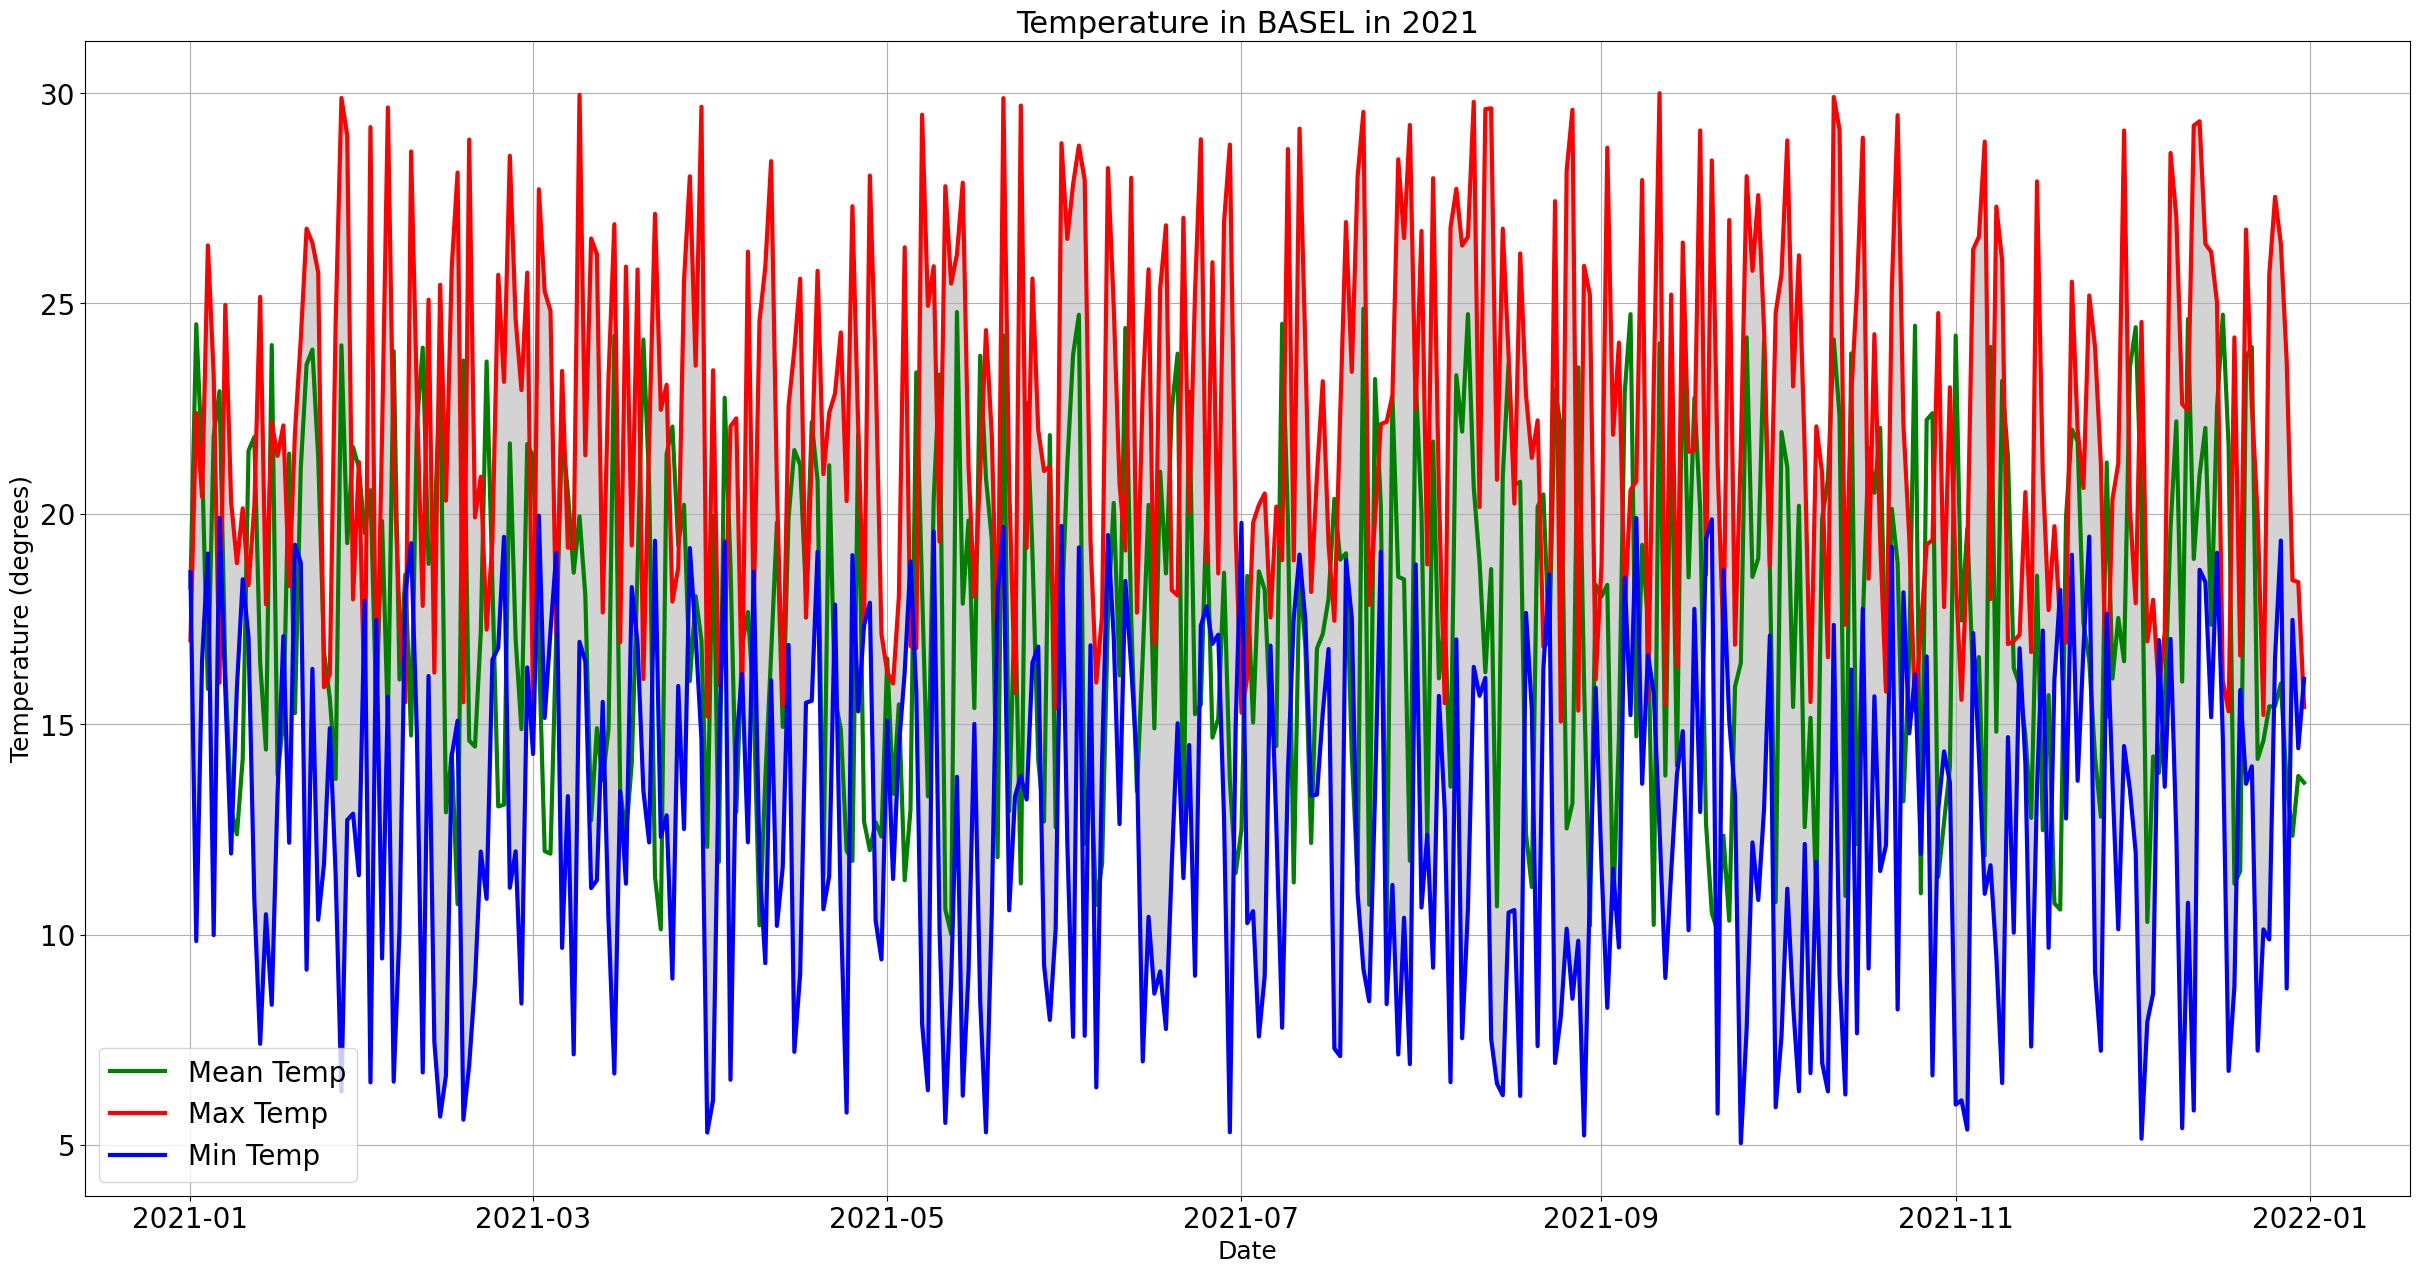

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame structure
data = {
    'date': pd.date_range(start='1/1/2021', end='12/31/2021'),
    'BASEL_temp_mean': np.random.uniform(10, 25, 365),
    'BASEL_temp_max': np.random.uniform(15, 30, 365),
    'BASEL_temp_min': np.random.uniform(5, 20, 365),
    # Add other columns as needed
}
df_day_grouped = pd.DataFrame(data)

# Filter data for the year 2021
y = 2021
df_temps = df_day_grouped[df_day_grouped['date'].dt.year == y]

# Plotting
fig, ax = plt.subplots(figsize=(30, 15))

# Plotting the mean, max, and min temperatures
ax.plot(df_temps['date'], df_temps['BASEL_temp_mean'], color='green', linewidth=3.0, label='Mean Temp')
ax.plot(df_temps['date'], df_temps['BASEL_temp_max'], color='red', linewidth=3.0, label='Max Temp')
ax.plot(df_temps['date'], df_temps['BASEL_temp_min'], color='blue', linewidth=3.0, label='Min Temp')

# Filling the area between min and max temperatures
ax.fill_between(df_temps['date'], df_temps['BASEL_temp_min'], df_temps['BASEL_temp_max'], color='lightgrey')

# Customizing the plot
plt.title(f"Temperature in BASEL in {y}", size=22)
plt.ylabel("Temperature (degrees)", size=18)
plt.xlabel("Date", size=18)
plt.grid(axis='both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# Display the plot
plt.show()


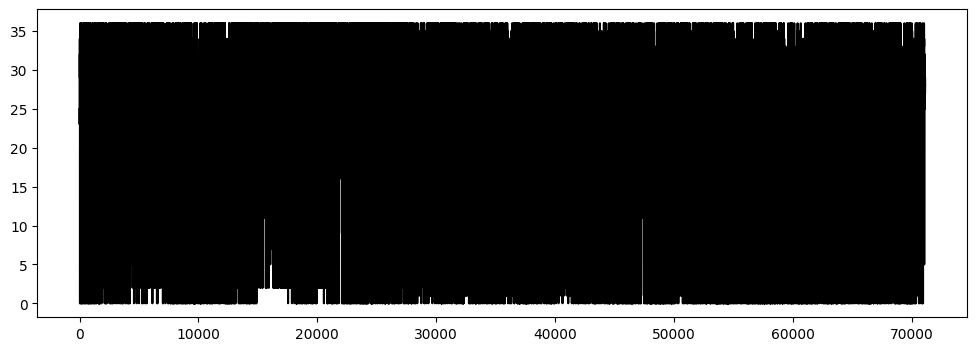

In [16]:
ts_wind_speed = df1['WIND_SPEED']
ts_wind_speed
ts_wind_direction = df1['WIND_DIRECTION']
ts_wind_direction.plot(figsize=(12,4), color='black')

ts_sin = np.sin(ts_wind_direction*10)
ts_cos = np.cos(ts_wind_direction*10)



[]

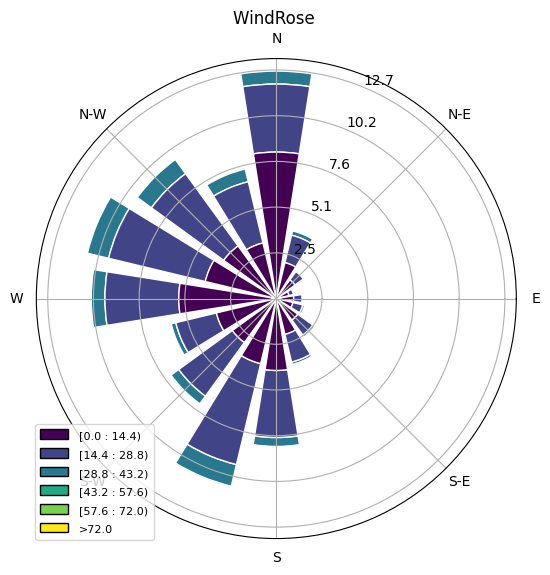

In [17]:
# fix degrees and this will work
# Windrose to analyze wind direction
# Windrose to see the wind direction in a better visualization
ts_wind_speed = df1['WIND_SPEED']
ts_wind_direction = df1['WIND_DIRECTION']
# I believe wind direction is in degrees starting 0 to 360. Angles rounded to 10
# where is the 0? Hyphotesis E = 0 and works anticlockwise

vientospeed     = ts_wind_speed
vientodirection = ts_wind_direction*10
title = 'WindRose '

plt.rc('legend', fontsize=10)

f = plt.figure(figsize=(12,6))

ax = WindroseAxes.from_ax(fig=f)
ax.bar(vientodirection, vientospeed, normed=True, opening=0.8, edgecolor='white')
ax.set_title(title)
ax.set_legend()
ax.plot()

=======================================================
##### Data Matrix Preparation
We transform the file in as sequence of examples \
(1) 1 2 3 4 5 6 7 8 9 10 -> lag 2 \
(1) 12, 23, 34, 45, 56, 67, 78, 89, 910 \
(2) 1 2 3 4 5 6 7 8 9 10 -> lag 3  \
(2) 123, 234, 345, 456, 567, 678, 789, 8910,  \

In [18]:
df1

,x,y,STATION_NAME,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,PROVINCE_CODE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,...,STATION_PRESSURE_FLAG,VISIBILITY,VISIBILITY_FLAG,WINDCHILL,WINDCHILL_FLAG,WIND_DIRECTION,WIND_DIRECTION_FLAG,WIND_SPEED,WIND_SPEED_FLAG,date
0,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1961.1.3.6,1961-01-03 06:00:00,NS,1961.0,1.0,3.0,...,NaN,16.1,NaN,-9.0,NaN,25.0,NaN,8.0,NaN,1961-01-03 06:00:00
1,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1961.1.3.7,1961-01-03 07:00:00,NS,1961.0,1.0,3.0,...,NaN,16.1,NaN,-11.0,NaN,29.0,NaN,10.0,NaN,1961-01-03 07:00:00
2,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1961.1.3.8,1961-01-03 08:00:00,NS,1961.0,1.0,3.0,...,NaN,16.1,NaN,-11.0,NaN,25.0,NaN,10.0,NaN,1961-01-03 08:00:00
3,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1961.1.3.9,1961-01-03 09:00:00,NS,1961.0,1.0,3.0,...,NaN,16.1,NaN,-11.0,NaN,29.0,NaN,10.0,NaN,1961-01-03 09:00:00
4,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1961.1.3.10,1961-01-03 10:00:00,NS,1961.0,1.0,3.0,...,NaN,16.1,NaN,-10.0,NaN,29.0,NaN,8.0,NaN,1961-01-03 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71124,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1986.2.9.10,1986-02-09 10:00:00,NS,1986.0,2.0,9.0,...,NaN,24.1,NaN,-15.0,NaN,29.0,NaN,26.0,NaN,1986-02-09 10:00:00
71125,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1986.2.9.11,1986-02-09 11:00:00,NS,1986.0,2.0,9.0,...,NaN,24.1,NaN,-13.0,NaN,29.0,NaN,26.0,NaN,1986-02-09 11:00:00
71126,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1986.2.9.12,1986-02-09 12:00:00,NS,1986.0,2.0,9.0,...,NaN,24.1,NaN,-12.0,NaN,28.0,NaN,24.0,NaN,1986-02-09 12:00:00
71127,-63.500014,44.880017,HALIFAX STANFIELD INT'L A,8202250,8202250.1986.2.9.13,1986-02-09 13:00:00,NS,1986.0,2.0,9.0,...,NaN,24.1,NaN,-11.0,NaN,28.0,NaN,28.0,NaN,1986-02-09 13:00:00


<Figure size 2000x1000 with 0 Axes>

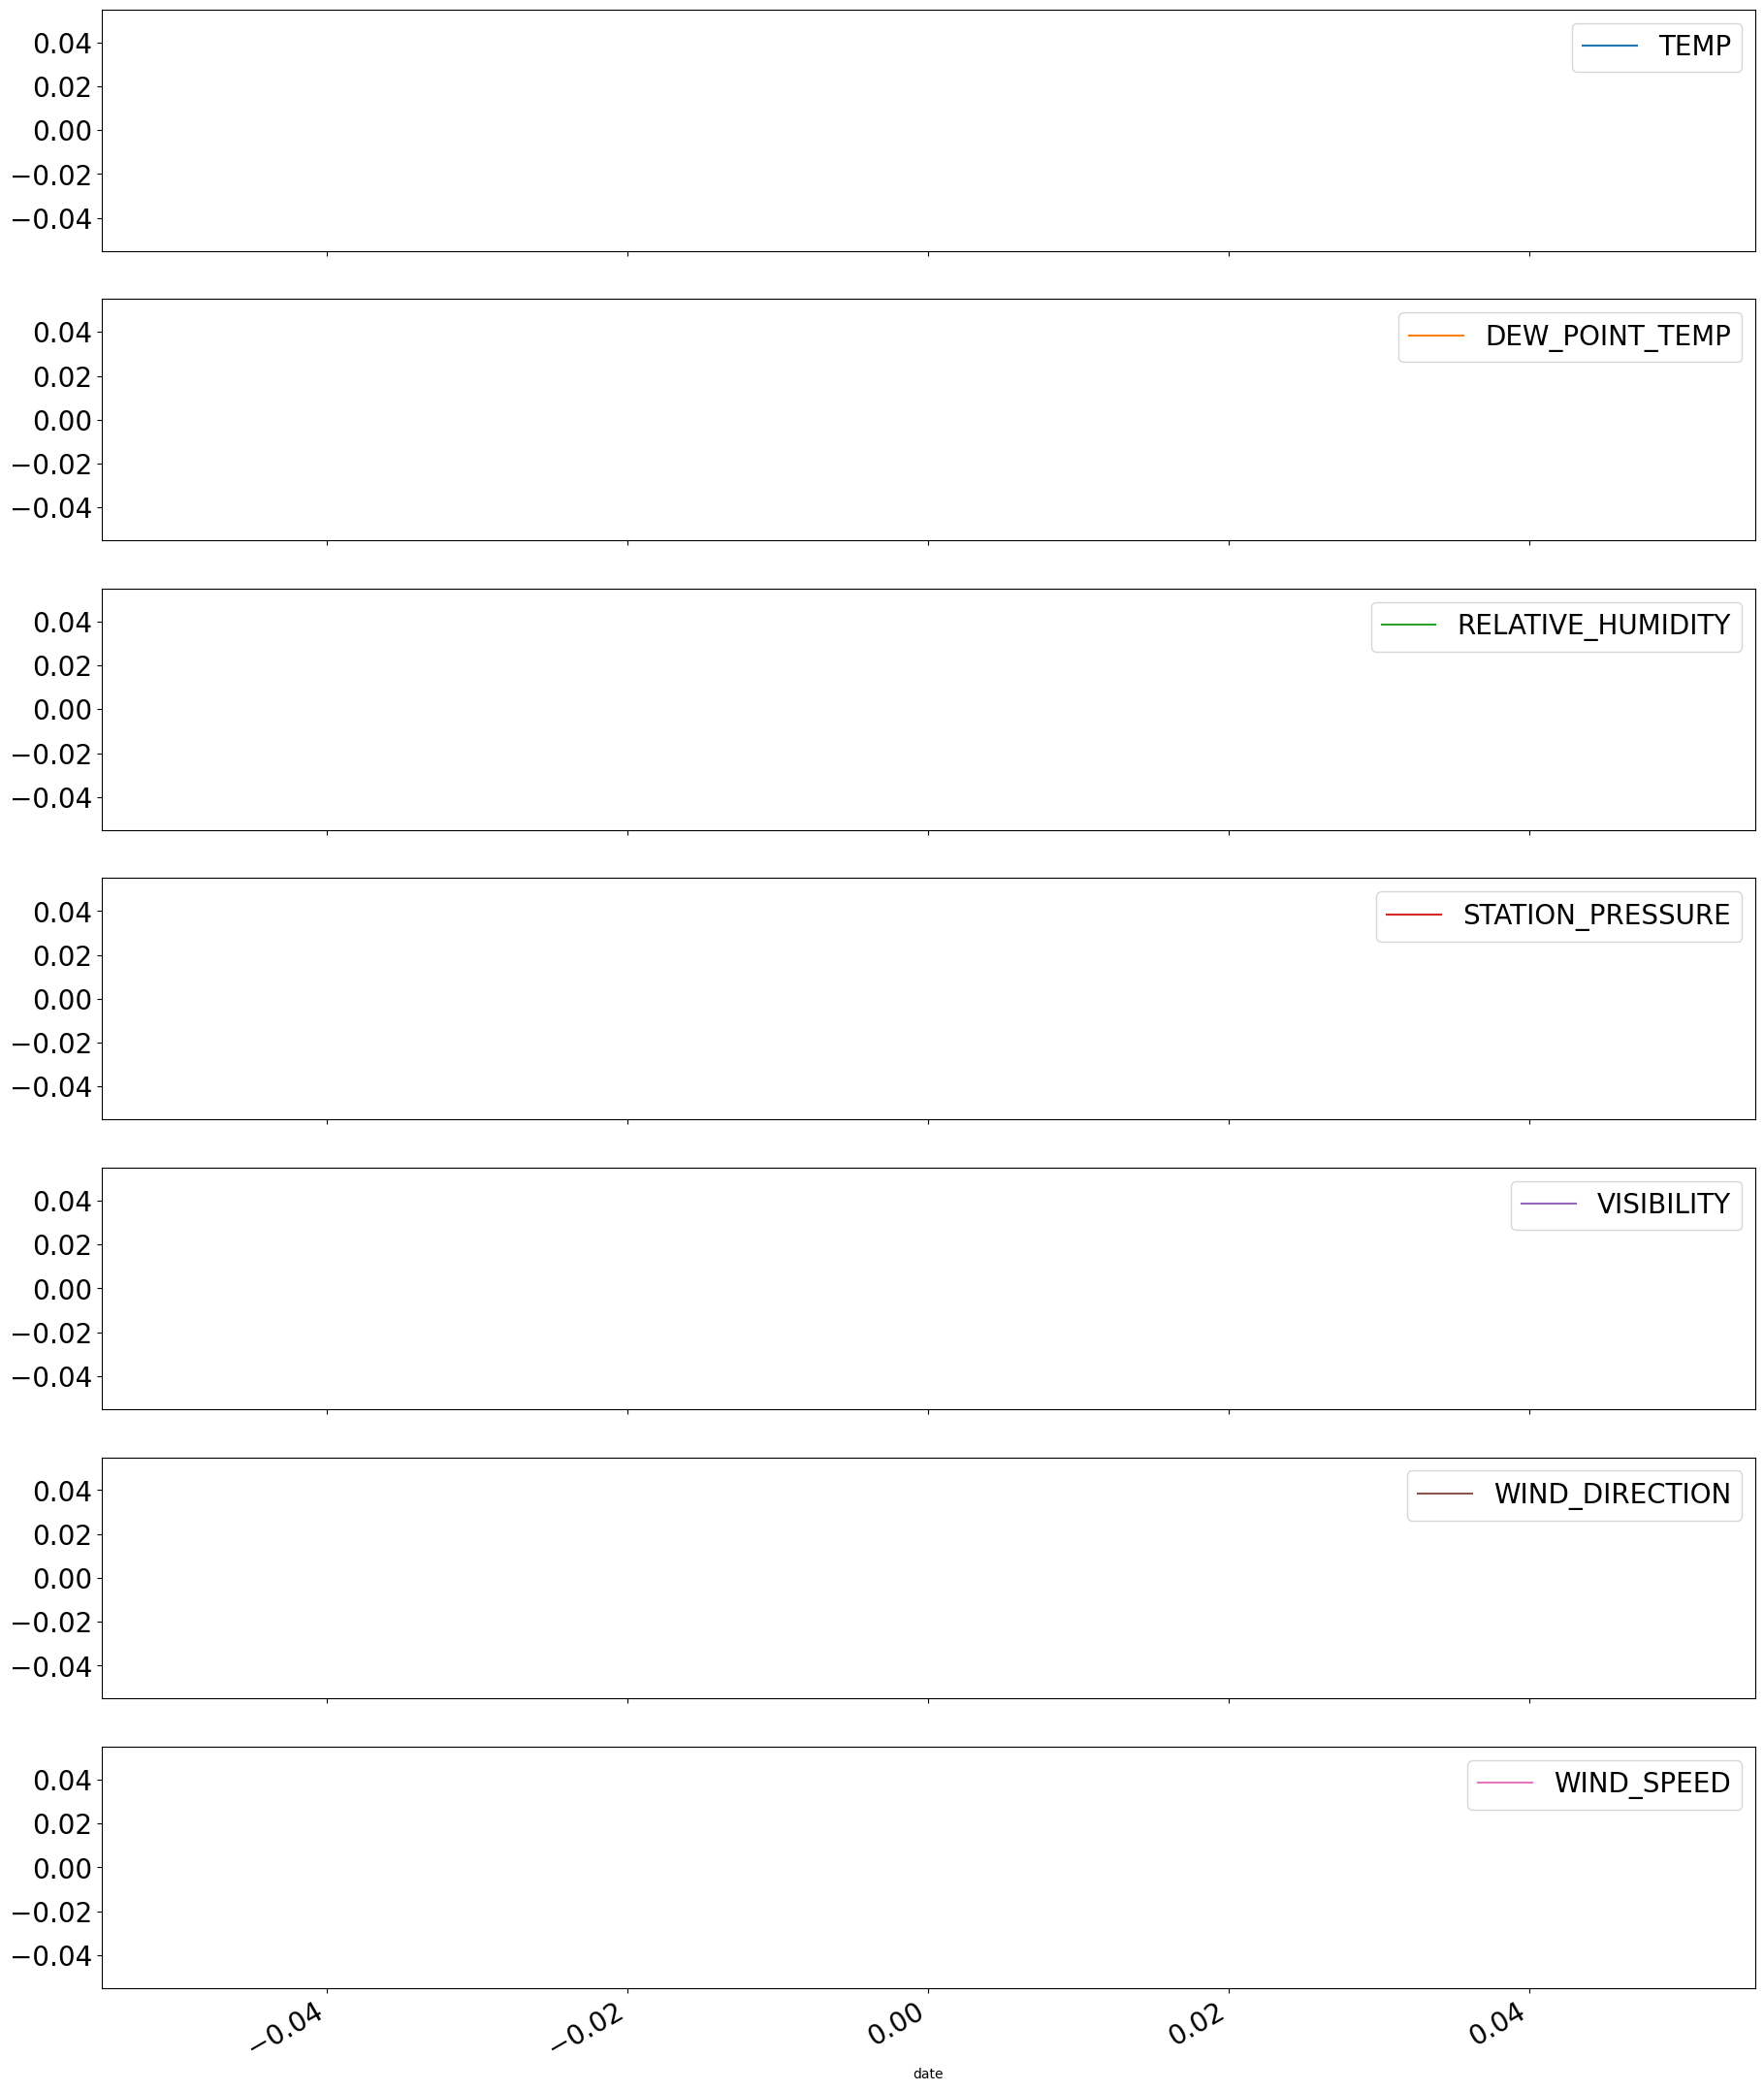

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is already defined and loaded with the necessary data
# Drop unnecessary columns
drop_cols = ['x', 'y', 'STATION_NAME', 'CLIMATE_IDENTIFIER', 'ID', 'LOCAL_DATE',
             'PROVINCE_CODE', 'LOCAL_YEAR', 'LOCAL_MONTH', 'LOCAL_DAY', 'LOCAL_HOUR']

ts_multivar = df1.drop(drop_cols, axis=1)

# Drop columns with NaN values
Nan_cols = ['DEW_POINT_TEMP_FLAG', 'HUMIDEX', 'HUMIDEX_FLAG', 'PRECIP_AMOUNT', 'STATION_PRESSURE_FLAG',
            'PRECIP_AMOUNT_FLAG', 'RELATIVE_HUMIDITY_FLAG', 'VISIBILITY_FLAG', 'WINDCHILL_FLAG',
            'WIND_DIRECTION_FLAG', 'WIND_SPEED_FLAG', 'WINDCHILL', 'TEMP_FLAG']
ts_multivar = ts_multivar.drop(Nan_cols, axis=1)

# Ensure 'date' column is in datetime format
ts_multivar['date'] = pd.to_datetime(ts_multivar['date'])

# Filter data for the year 2021
df = ts_multivar[ts_multivar['date'].dt.year == 2021]

# Plotting
plt.figure(figsize=(20, 10))
plt.rc('legend', fontsize=20)
df.set_index('date').plot(subplots=True, legend=True, figsize=(22, 30), use_index=True, fontsize=20)
plt.show()


In [20]:
ts_multivar.isna().sum().sum()
ts_multivar = ts_multivar.dropna()

In [21]:
ts_multivar = ts_multivar.drop('date', axis=1)
weather_data = ts_multivar.to_numpy()
weather_data.shape

(71126, 7)

In [22]:
#===================
lag = 30
ahead = 24
#====================

# Examples dataframe creation
#print('Input dataframe structure', ts_multivar.shape)

# create train, test, val (60%, 20%, 20%)
train_split = 0.6
test_split = 0.2

datasize =  weather_data.shape[0]
trainsize = int(datasize * train_split)
half_test = int(datasize * test_split)
testsize = int(half_test*2)

sc=StandardScaler()
tmpdata = sc.fit_transform(weather_data)
Scaler = sc.fit(weather_data[:, 0].reshape(-1, 1))  # saves the scaler for the first variable for descaling
#Scaler = sc.fit(weather_data[:, 0])  # saves the scaler for the first variable for descaling
weather_data = tmpdata


In [23]:
t_s_multivariate = weather_data

def lag_matrix(wind_train, lag=lag, ahead=ahead):
    wind_train = data[:trainsize, :]
    lvect = []
    for i in range(lag + ahead):
       lvect.append(data[i: -lag - ahead + i, :])
    return(np.stack(lvect, axis=1))

# data = train -> test -> val

data = t_s_multivariate[:trainsize, :]

train = lag_matrix(data, lag, ahead)

train_x = train[:, :lag]
train_x = np.swapaxes(train_x, 1, 2)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1] * train_x.shape[2]))

data  = t_s_multivariate[trainsize:trainsize + testsize, :]

test  = lag_matrix(data, lag, ahead)
half_test = int(test.shape[0] / 2)

test_x = test[:half_test, :lag]
val_x = test[half_test:, :lag]

train_y = train[:, -ahead:, 0]
test_y   = test[:half_test, -ahead:, 0]
val_y  = test[half_test:, -ahead:, 0]


test_x = np.swapaxes(test_x, 1, 2)
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1] * test_x.shape[2]))
val_x = np.swapaxes(val_x, 1, 2)
val_x = np.reshape(val_x, (val_x.shape[0], val_x.shape[1] * val_x.shape[2]))


print("=========== SHAPE INPUT-OUTPUT MATRIXES =====================")
print("shape x_training :", train_x.shape, " y_training: : ", train_y.shape)
print("shape x_test     : ", test_x.shape, " y_test      : ", test_y.shape)
print("shape x_val      : ", val_x.shape,  " y_val       : ", val_y.shape)
print("=============================================================")

input_dimensions = train_x.shape[1:]
print(input_dimensions)

=========== SHAPE INPUT-OUTPUT MATRIXES =====================
shape x_training : (42621, 210)  y_training: :  (42621, 24)
shape x_test     :  (14198, 210)  y_test      :  (14198, 24)
shape x_val      :  (14198, 210)  y_val       :  (14198, 24)
(210,)


In [24]:
data_input = Input(shape=input_dimensions)
layer = Dense(1024)(data_input)
layer = ELU(alpha=0.3)(layer)
layer = Dropout(rate=0.3)(layer)
layer = Dense(512, activation= 'elu')(layer)
layer = Dropout(rate=0.3)(layer)
layer = Dense(512, activation= 'elu')(layer)
layer = Dropout(rate=0.3)(layer)
output = Dense(ahead, activation='linear')(layer)

MLP = Model(inputs=data_input, outputs=output, name='MLP')
MLP.summary()

opt = Adam(0.0001, clipnorm=1.)
MLP.compile(loss='mean_squared_error',optimizer=opt, )

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 210)]             0         
                                                                 
 dense (Dense)               (None, 1024)              216064    
                                                                 
 elu (ELU)                   (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656  

In [ ]:
# Network training
batch_size = 1024
nepochs = 200
early = EarlyStopping(monitor='val_loss', patience=10, verbose=0)

MLP.fit(train_x, train_y, batch_size=batch_size, epochs=nepochs, validation_data=(test_x, test_y),
         verbose=True, callbacks=[early])


Epoch 1/200
42/42 [==============================] - 9s 169ms/step - loss: 0.7138 - val_loss: 0.2271
Epoch 2/200
42/42 [==============================] - 8s 201ms/step - loss: 0.4248 - val_loss: 0.1985
Epoch 3/200
42/42 [==============================] - 7s 159ms/step - loss: 0.3516 - val_loss: 0.1882
Epoch 4/200
42/42 [==============================] - 8s 200ms/step - loss: 0.3133 - val_loss: 0.1815
Epoch 5/200
42/42 [==============================] - 7s 159ms/step - loss: 0.2861 - val_loss: 0.1776
Epoch 6/200
42/42 [==============================] - 8s 201ms/step - loss: 0.2682 - val_loss: 0.1759
Epoch 7/200
42/42 [==============================] - 7s 159ms/step - loss: 0.2546 - val_loss: 0.1736
Epoch 8/200
20/42 [=============>................] - ETA: 4s - loss: 0.2448

In [ ]:
# Perform predictions

val_yp = MLP.predict(val_x, batch_size=batch_size, verbose=0)
test_yp = MLP.predict(test_x, batch_size=batch_size, verbose=0)

In [ ]:
val_yp.shape

In [ ]:
# Evaluating results

lresults = []
val_y_R2 = []
test_y_R2 = []
acum_val, acum_test = 0,0
for i in range (1,ahead+1):
   v_yp = Scaler.inverse_transform(val_yp[:, i - 1].reshape(-1,1))
   v_y = Scaler.inverse_transform(val_y[:, i - 1].reshape(-1,1))
   t_yp = Scaler.inverse_transform(test_yp[:, i - 1].reshape(-1,1))
   t_y = Scaler.inverse_transform(test_y[:, i - 1].reshape(-1,1))
   val_y_R2.append(r2_score(v_yp,v_y))
   test_y_R2.append(r2_score(t_yp, t_y))

print ("Results === Test == Validation ")
print('=============================')
for i in range (0,ahead):
   print('step', "{:<4d}".format(i+1), '- ', "{:.3f}".format(val_y_R2[i]), "   {:.3f}".format(test_y_R2[i]))
   acum_val = acum_val + val_y_R2[i]
   acum_test = acum_test + test_y_R2[i]
print('=============================')
print('Summary', '  - ', "{:.3f}".format(acum_val), "   {:.3f}".format(acum_test))

In [ ]:
v_y.shape

In [ ]:

a = v_y[-180:,]
a.shape

In [ ]:
#plot prediction and ground truth
# Let's do it for the last 100 days
d = [x for x in range(180)]


df_temps = df_day_grouped[df_day_grouped['date'].dt.year == 2021 ]
fig, ax = plt.subplots(figsize=(30,15))

ax.plot(d,v_y[-180:,],color='green',linewidth=3.0, )
ax.plot(d,v_yp[-180:,],color='red',linewidth=3.0, linestyle='--')
ax.legend(["real temperature", "predicted temperature"])
plt.title("Temperature in Standsed Airport HALIFAX in "+str(y), size=22)
plt.ylabel("TEMP (degrees)", size=18)
plt.xlabel("date", size=18)
plt.grid(axis='both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
pip install session_info

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already defined
# df = pd.read_csv('your_data.csv')

# Step 2: Define features (X) and target (y)
# Assuming we use 'HUMIDEX', 'WIND_SPEED', and 'DEW_POINT_TEMP' as features
X = df[['WIND_SPEED', 'DEW_POINT_TEMP']]
y = df['TEMP']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict the temperature values on the test set
y_pred = model.predict(X_test)

# Step 4: Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Temperature')
plt.show()


In [ ]:
import session_info
session_info.show(html=False)

In [ ]:
#EOF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already defined
# df = pd.read_csv('your_data.csv')

# Step 2: Define features (X) and target (y)
# Assuming we use 'HUMIDEX', 'WIND_SPEED', and 'DEW_POINT_TEMP' as features
X = df[['WIND_SPEED', 'DEW_POINT_TEMP']]
y = df['TEMP']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict the temperature values on the test set
y_pred = model.predict(X_test)

# Step 4: Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Temperature')
plt.show()
